# importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data 

In [2]:
Hotel_data = pd.read_csv('hotel_bookings.csv')

In [3]:
Hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Data Pre-processing

In [4]:
Hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Above if we can see the reservation_status_date has the datatype as a Obejct. so we want to change it into datetime.

Hotel_data['reservation_status_date'] = pd.to_datetime(Hotel_data['reservation_status_date'])

In [6]:
Hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [7]:
Hotel_data.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [8]:
for col in Hotel_data.describe(include = 'object').columns:
    print(col)
    print(Hotel_data[col].unique())
    print('-'*100)

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK

In [9]:
Hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# here we can see that null values present in 'agent' and 'company' column is in high proportion as comapred to whole data.
# so handling these columns causes fluctuations in our insights so we can remove the colmuns from the dataset

Hotel_data.drop(['agent', 'company'], axis = 1, inplace = True)


In [11]:
Hotel_data.dropna(inplace=True)

In [12]:
Hotel_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
Hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

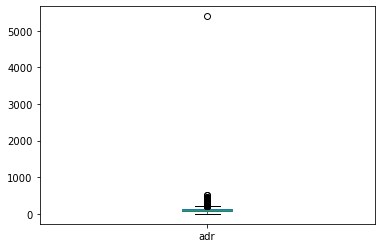

In [14]:
Hotel_data['adr'].plot(kind = 'box')

In [15]:
Hotel_data = Hotel_data[Hotel_data['adr']<1000]

<AxesSubplot:>

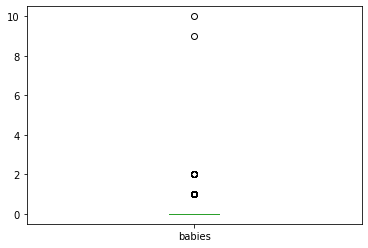

In [16]:
Hotel_data['babies'].plot(kind = 'box')

In [17]:
Hotel_data = Hotel_data[Hotel_data['babies']<4]

<AxesSubplot:>

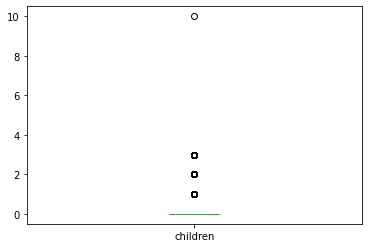

In [18]:
Hotel_data['children'].plot(kind = 'box')

In [19]:
Hotel_data = Hotel_data[Hotel_data['children']<4]

<AxesSubplot:>

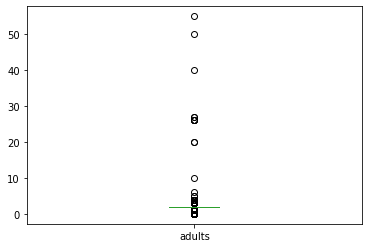

In [20]:
Hotel_data['adults'].plot(kind = 'box')

In [21]:
Hotel_data = Hotel_data[Hotel_data['adults']<30]

# Data analysis and Visualization

In [22]:
# here we can first analyize how much percentage of bookings were cancelres during the given period

perc_calculation = Hotel_data['is_canceled'].value_counts(normalize = True)
perc_calculation

0    0.628668
1    0.371332
Name: is_canceled, dtype: float64

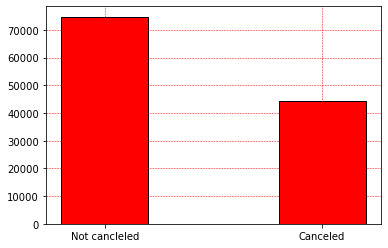

In [23]:
#visualizing the above data 
plt.bar(['Not cancleled', 'Canceled'], Hotel_data['is_canceled'].value_counts(), width = 0.4,  edgecolor= 'k', color = 'r' )
plt.grid(color = 'red', linestyle = '--', linewidth = 0.5)


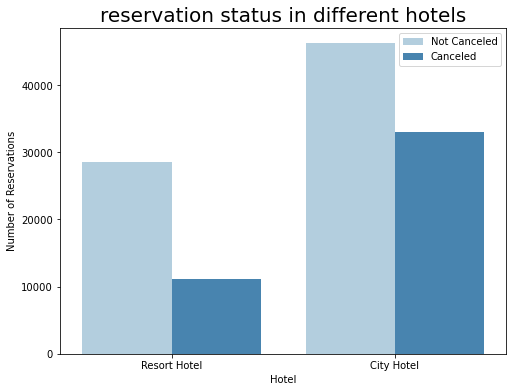

In [25]:
# here we have to check the count of cancelation by hotel type 
plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'hotel', hue = 'is_canceled',  data = Hotel_data, palette= 'Blues' )
plt.legend(labels = ['Not Canceled', 'Canceled'])
plt.title("reservation status in different hotels", size = 20)
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')
plt.show()



In [26]:
# here we can check cancelation percentage by hotel  type 

resort_hotel = Hotel_data[Hotel_data['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize= True)

0    0.720322
1    0.279678
Name: is_canceled, dtype: float64

In [27]:
city_hotel = Hotel_data[Hotel_data['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize= True)


0    0.582908
1    0.417092
Name: is_canceled, dtype: float64

In [28]:
# above we can clearly see that 27% and 41% cancelation in resort hotels and city hotels respectively..

In [29]:
# now here we calculate average daily rate for resort and city hotels.


resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()



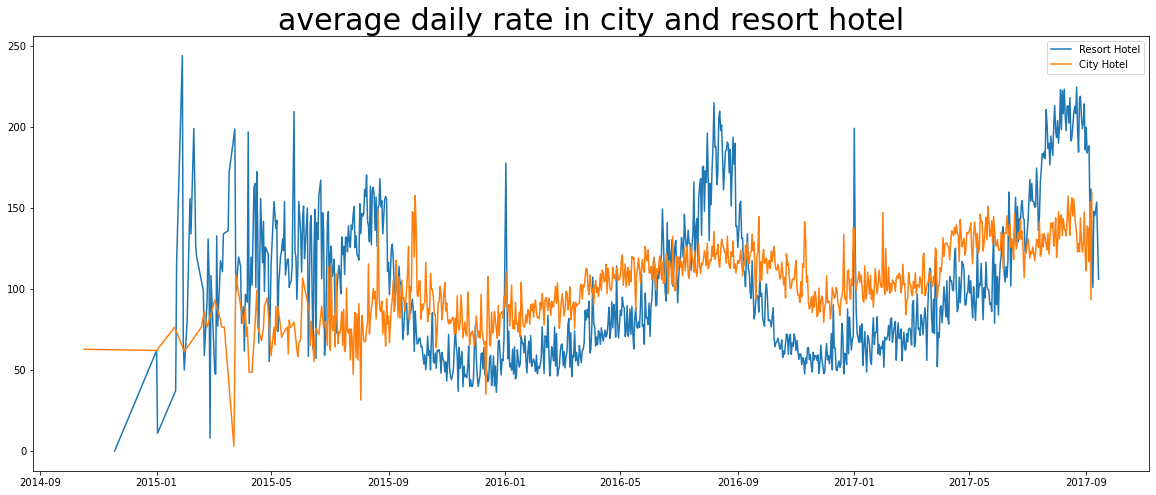

In [32]:
plt.figure(figsize= (20,8))
plt.title('average daily rate in city and resort hotel', size = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend()
plt.show()

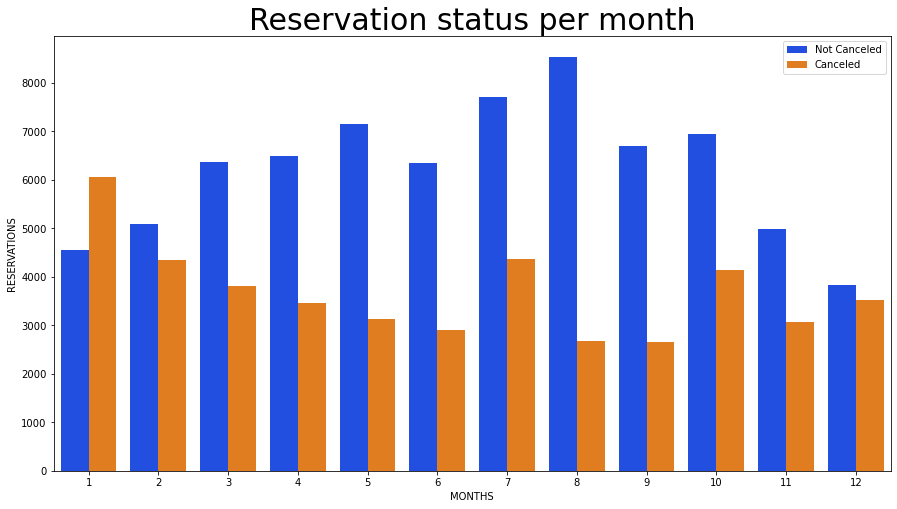

In [36]:
Hotel_data['month'] = Hotel_data['reservation_status_date'].dt.month
plt.figure(figsize=(15, 8))
ax= sns.countplot(x = 'month', hue = 'is_canceled', data = Hotel_data, palette= 'bright')
plt.title('Reservation status per month', size = 30)
plt.xlabel('MONTHS')
plt.ylabel('RESERVATIONS')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

In [37]:
data_canceled = Hotel_data[Hotel_data['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()
data_canceled.head()

,month,adr
0,1,571203.57
1,2,447675.76
2,3,424872.56
3,4,425315.23
4,5,391438.08


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


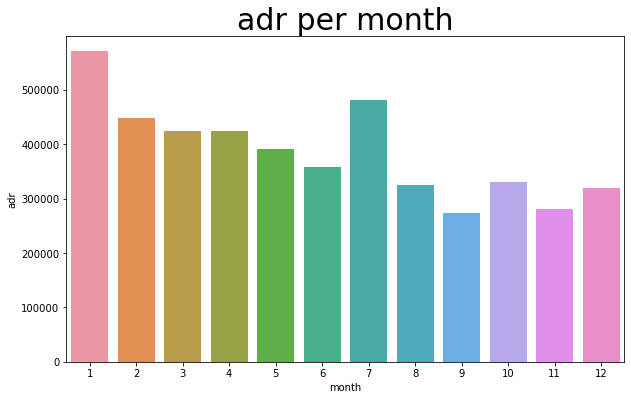

In [39]:
# here we have to see adr per month to check the impact of pricing on cancelation rate in particular month.
plt.figure(figsize= (10, 6))
plt.title('adr per month', size = 30)
sns.barplot('month', 'adr', data= data_canceled )
plt.show()

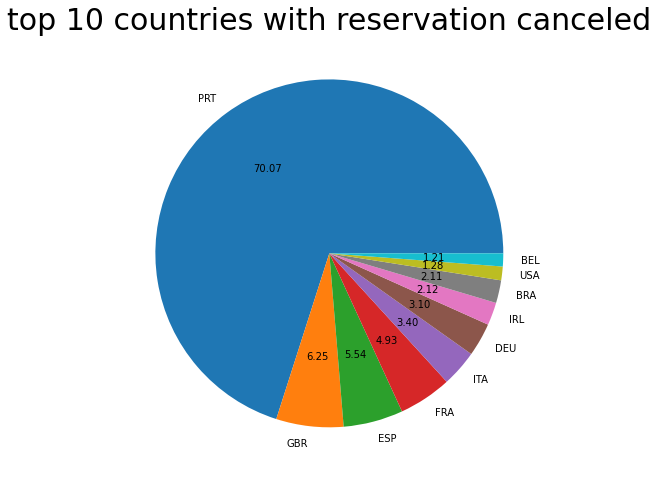

In [43]:
# top_10_counntries cancellation plot 
canceled_data = Hotel_data[Hotel_data['is_canceled'] == 1]
top_10_countries = canceled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('top 10 countries with reservation canceled', size = 30)
plt.pie(top_10_countries, autopct = '%.2f', labels = top_10_countries.index)
plt.show()

In [44]:
#checking booking rate acc to market segment 
Hotel_data['market_segment'].value_counts(normalize= True)

Online TA        0.474393
Offline TA/TO    0.203195
Groups           0.166590
Direct           0.104676
Corporate        0.042981
Complementary    0.006174
Aviation         0.001993
Name: market_segment, dtype: float64

In [45]:
#checking cancellation rate acc to makret segment.
canceled_data['market_segment'].value_counts(normalize= True)

Online TA        0.469738
Groups           0.274010
Offline TA/TO    0.187460
Direct           0.043422
Corporate        0.022153
Complementary    0.002039
Aviation         0.001178
Name: market_segment, dtype: float64

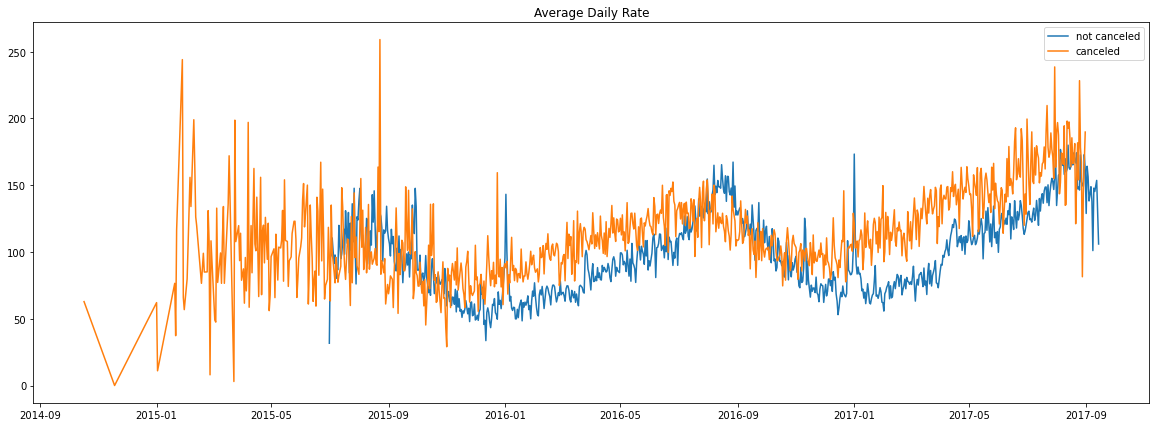

In [46]:
canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace= True)
canceled_df_adr.sort_values('reservation_status_date', inplace = True)

not_canceled_data = Hotel_data[Hotel_data['is_canceled']== 0]
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace= True)
not_canceled_df_adr.sort_values('reservation_status_date', inplace = True)


plt.figure(figsize=(20, 7))
plt.title('Average Daily Rate')
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label = 'not canceled')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label = 'canceled')
plt.legend()
plt.show()


In [47]:
canceled_df_adr = canceled_df_adr[(canceled_df_adr['reservation_status_date']>'2015-09') & (canceled_df_adr['reservation_status_date']<'2017-09')]
not_canceled_df_adr = not_canceled_df_adr[(not_canceled_df_adr['reservation_status_date']>'2015-09') & (not_canceled_df_adr['reservation_status_date']<'2017-09')]

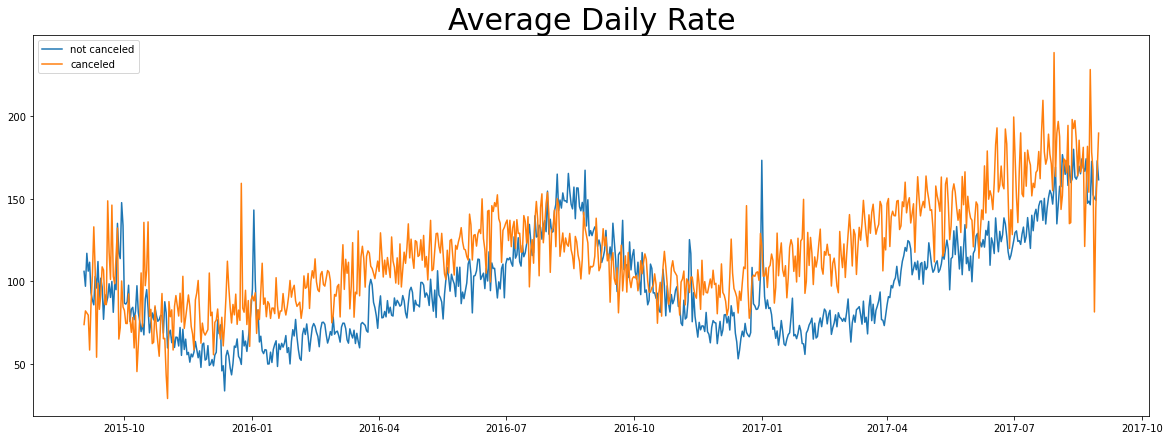

In [49]:
plt.figure(figsize=(20, 7))
plt.title('Average Daily Rate', size = 30)
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label = 'not canceled')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label = 'canceled')
plt.legend()
plt.show()
